In [ ]:
##Importing drive and mounting 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importing libraries 
import pandas as pd 
import numpy as np


In [ ]:
#Loading given datase into dataframe
SwiftData=pd.read_excel("/content/drive/MyDrive/Final_hackthon/Quickfreightdata.xlsx")

**Data Exploration**

In [ ]:
SwiftData.shape

(18739, 13)

In [ ]:
SwiftData.head()

,ORDER_NBR,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_ZIP,FIRST_PICK_EARLY_APPT,FIRST_PICK_LATE_APPT,LAST_DELIVERY_ZIP,LAST_DELIVERY_EARLY_APPT,LAST_DELIVERY_LATE_APPT,IS_HAZARDOUS,CREATED_DATE
0,535361133,53 FLATBED,802,42000,0.00,21224,2015-07-13 07:30:00,2015-07-13 15:00:00,62707,2015-07-14 08:00:00,2015-07-14 16:00:00,N,2015-07-01 10:22:00
1,1499443993,V,0,40500,875.00,L1W 3H9,2015-07-06 14:00:00,2015-07-06 14:00:00,13619,2015-07-07 07:00:00,2015-07-07 16:00:00,N,2015-07-02 10:37:00
2,1058279607,NaN,774,0,88.14,46037,2015-07-01 08:00:00,2015-07-02 17:00:00,73107,2015-07-07 08:00:00,2015-07-07 17:00:00,N,2015-07-01 15:05:00
3,2093496262,V,0,40500,875.00,L1W 3H9,2015-07-07 14:00:00,2015-07-07 14:00:00,13619,2015-07-08 07:00:00,2015-07-08 16:00:00,N,2015-07-02 10:38:00
4,2373724838,V,0,40500,875.00,L1W 3H9,2015-07-08 14:00:00,2015-07-08 14:00:00,13619,2015-07-09 07:00:00,2015-07-09 16:00:00,N,2015-07-02 11:16:00


In [ ]:
SwiftData.tail()

,ORDER_NBR,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_ZIP,FIRST_PICK_EARLY_APPT,FIRST_PICK_LATE_APPT,LAST_DELIVERY_ZIP,LAST_DELIVERY_EARLY_APPT,LAST_DELIVERY_LATE_APPT,IS_HAZARDOUS,CREATED_DATE
18734,675767319,R,707,26405,1500.0,84104,2015-09-01 11:00:00,2015-09-01 18:00:00,85353,2015-09-03 08:30:00,2015-09-03 08:30:00,N,2015-08-28 17:19:00
18735,2597037520,R,1230,42500,0.0,84088,2015-08-31 20:00:00,2015-08-31 20:00:00,76102,2015-09-03 13:00:00,2015-09-03 13:00:00,N,2015-08-28 17:22:00
18736,1272142564,R,1924,42000,2500.0,78521,2015-09-04 09:00:00,2015-09-04 17:00:00,95380,2015-09-07 07:00:00,2015-09-07 07:00:00,N,2015-09-03 08:31:00
18737,830532830,R,2185,40000,5300.0,4915,2015-09-03 14:30:00,2015-09-03 14:30:00,29209,2015-09-07 06:00:00,2015-09-07 06:00:00,N,2015-09-03 13:08:00
18738,1119673825,R,2185,40000,5300.0,4915,2015-09-03 14:30:00,2015-09-03 14:30:00,30336,2015-09-07 13:00:00,2015-09-07 13:00:00,N,2015-09-03 13:08:00


In [ ]:
SwiftData.nunique().sort_values(ascending = False)

ORDER_NBR                   18739
CREATED_DATE                12181
LAST_DELIVERY_LATE_APPT      3874
LAST_DELIVERY_EARLY_APPT     3699
FIRST_PICK_LATE_APPT         3155
FIRST_PICK_EARLY_APPT        3090
WEIGHT                       2678
LAST_DELIVERY_ZIP            1843
CUSTOMER_MILES               1411
FIRST_PICK_ZIP                842
ORDER_COST                    758
EQUIPMENT_TYPE                 28
IS_HAZARDOUS                    2
dtype: int64

If we observe at unique level in Order_NBR we have 18736 ..

In [ ]:
def present_null_values_info(SwiftData):
    
    
    """
    Displaying null value info for the given data frame
    
    """

    SwiftData_about_null_value=pd.DataFrame()
    if SwiftData.isnull().sum().sum()>0:

        SwiftData_about_null_value["columns"]=list(SwiftData.columns)
        SwiftData_about_null_value["null_value_count"]=list(SwiftData.isnull().sum())
        SwiftData_about_null_value["Total_no_of_values"]=SwiftData.shape[0]
        SwiftData_about_null_value["%_of_null_values"]=list(SwiftData.isnull().mean()*100)
        
        
        
        SwiftData_about_null_value = SwiftData_about_null_value.sort_values("%_of_null_values",ascending=False)
        SwiftData_about_null_value.reset_index(inplace = True)
        SwiftData_about_null_value.drop(["index"],axis=1,inplace = True)
        null_value_columns = SwiftData_about_null_value[SwiftData_about_null_value["%_of_null_values"]>0]
        
        return null_value_columns
        
    else:
        return "no null values"
        

In [ ]:
present_null_values_info(SwiftData)

,columns,null_value_count,Total_no_of_values,%_of_null_values
0,EQUIPMENT_TYPE,1011,18739,5.395165
1,LAST_DELIVERY_LATE_APPT,386,18739,2.059875
2,LAST_DELIVERY_EARLY_APPT,329,18739,1.755697
3,FIRST_PICK_LATE_APPT,304,18739,1.622285
4,FIRST_PICK_EARLY_APPT,260,18739,1.387481
5,ORDER_COST,6,18739,0.032019


Checking For Duplicate Records

In [ ]:
duplicate_records = SwiftData[SwiftData.duplicated()]
print("No of Duplicate records in Dataset : ",duplicate_records.shape[0])


No of Duplicate records in Dataset :  0


We dont have any duplicate columns

In [ ]:
SwiftData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18739 entries, 0 to 18738
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ORDER_NBR                 18739 non-null  int64         
 1   EQUIPMENT_TYPE            17728 non-null  object        
 2   CUSTOMER_MILES            18739 non-null  int64         
 3   WEIGHT                    18739 non-null  int64         
 4   ORDER_COST                18733 non-null  float64       
 5   FIRST_PICK_ZIP            18739 non-null  object        
 6   FIRST_PICK_EARLY_APPT     18479 non-null  datetime64[ns]
 7   FIRST_PICK_LATE_APPT      18435 non-null  datetime64[ns]
 8   LAST_DELIVERY_ZIP         18739 non-null  object        
 9   LAST_DELIVERY_EARLY_APPT  18410 non-null  datetime64[ns]
 10  LAST_DELIVERY_LATE_APPT   18353 non-null  datetime64[ns]
 11  IS_HAZARDOUS              18739 non-null  object        
 12  CREATED_DATE      

Here we have Five Date Related columns

In [ ]:
Date_cols=list(SwiftData.select_dtypes(include = "datetime").columns)

In [ ]:
# assigning int and removing Order_NBR code from int float cols to num_cols

int_cols = list(SwiftData.select_dtypes(include = "int").columns)
int_cols.remove("ORDER_NBR")


float_cols = list(SwiftData.select_dtypes(include = "float").columns)
num_cols = int_cols+float_cols

In [ ]:
num_cols

['CUSTOMER_MILES', 'WEIGHT', 'ORDER_COST']

In [ ]:
cat_cols =  list(SwiftData.select_dtypes(include = "object").columns)
cat_cols.append("ORDER_NBR")

cat_cols = list(cat_cols)

In [ ]:
Cat_cols_vis=["EQUIPMENT_TYPE","IS_HAZARDOUS"]

In [ ]:
cat_cols

['EQUIPMENT_TYPE',
 'FIRST_PICK_ZIP',
 'LAST_DELIVERY_ZIP',
 'IS_HAZARDOUS',
 'ORDER_NBR']

***Type Conversion***

In [ ]:
for i in cat_cols:
    SwiftData[i] = SwiftData[i].astype("category") 
    
    
for i in num_cols:
    SwiftData[i] = SwiftData[i].astype("float")


**Feature Extraction **

As we have date related columns we can extract  some columns , by differencing some relevent columns

In [ ]:
SwiftData['Time_BETWEEN_EARLY'] = (SwiftData['LAST_DELIVERY_EARLY_APPT'] - SwiftData['FIRST_PICK_EARLY_APPT']).dt.total_seconds()/3600
SwiftData['Time_BETWEEN_LATE'] = (SwiftData['LAST_DELIVERY_LATE_APPT'] - SwiftData['FIRST_PICK_LATE_APPT']).dt.total_seconds()/3600

SwiftData['FIRST_PICK_DURATION'] = (SwiftData['FIRST_PICK_LATE_APPT'] - SwiftData['FIRST_PICK_EARLY_APPT']).dt.total_seconds() / 3600
SwiftData['LAST_DELIVERY_DURATION'] = (SwiftData['LAST_DELIVERY_LATE_APPT'] - SwiftData['LAST_DELIVERY_EARLY_APPT']).dt.total_seconds() / 3600

SwiftData['ORDER_PROCESSING_TIME'] = (SwiftData['FIRST_PICK_EARLY_APPT'] - SwiftData['CREATED_DATE']).dt.total_seconds() / 3600
SwiftData['ORDER_DURATION'] = (SwiftData['LAST_DELIVERY_LATE_APPT'] - SwiftData['CREATED_DATE']).dt.total_seconds() / 3600




In [ ]:
SwiftData.head()

,ORDER_NBR,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_ZIP,FIRST_PICK_EARLY_APPT,FIRST_PICK_LATE_APPT,LAST_DELIVERY_ZIP,LAST_DELIVERY_EARLY_APPT,LAST_DELIVERY_LATE_APPT,IS_HAZARDOUS,CREATED_DATE,Time_BETWEEN_EARLY,Time_BETWEEN_LATE,FIRST_PICK_DURATION,LAST_DELIVERY_DURATION,ORDER_PROCESSING_TIME,ORDER_DURATION
0,535361133,53 FLATBED,802.0,42000.0,0.00,21224,2015-07-13 07:30:00,2015-07-13 15:00:00,62707,2015-07-14 08:00:00,2015-07-14 16:00:00,N,2015-07-01 10:22:00,24.5,25.0,7.5,8.0,285.133333,317.633333
1,1499443993,V,0.0,40500.0,875.00,L1W 3H9,2015-07-06 14:00:00,2015-07-06 14:00:00,13619,2015-07-07 07:00:00,2015-07-07 16:00:00,N,2015-07-02 10:37:00,17.0,26.0,0.0,9.0,99.383333,125.383333
2,1058279607,NaN,774.0,0.0,88.14,46037,2015-07-01 08:00:00,2015-07-02 17:00:00,73107,2015-07-07 08:00:00,2015-07-07 17:00:00,N,2015-07-01 15:05:00,144.0,120.0,33.0,9.0,-7.083333,145.916667
3,2093496262,V,0.0,40500.0,875.00,L1W 3H9,2015-07-07 14:00:00,2015-07-07 14:00:00,13619,2015-07-08 07:00:00,2015-07-08 16:00:00,N,2015-07-02 10:38:00,17.0,26.0,0.0,9.0,123.366667,149.366667
4,2373724838,V,0.0,40500.0,875.00,L1W 3H9,2015-07-08 14:00:00,2015-07-08 14:00:00,13619,2015-07-09 07:00:00,2015-07-09 16:00:00,N,2015-07-02 11:16:00,17.0,26.0,0.0,9.0,146.733333,172.733333


In [ ]:
SwiftData.dtypes

ORDER_NBR                         category
EQUIPMENT_TYPE                    category
CUSTOMER_MILES                     float64
WEIGHT                             float64
ORDER_COST                         float64
FIRST_PICK_ZIP                    category
FIRST_PICK_EARLY_APPT       datetime64[ns]
FIRST_PICK_LATE_APPT        datetime64[ns]
LAST_DELIVERY_ZIP                 category
LAST_DELIVERY_EARLY_APPT    datetime64[ns]
LAST_DELIVERY_LATE_APPT     datetime64[ns]
IS_HAZARDOUS                      category
CREATED_DATE                datetime64[ns]
Time_BETWEEN_EARLY                 float64
Time_BETWEEN_LATE                  float64
FIRST_PICK_DURATION                float64
LAST_DELIVERY_DURATION             float64
ORDER_PROCESSING_TIME              float64
ORDER_DURATION                     float64
dtype: object

In [ ]:
SwiftData.describe()

,CUSTOMER_MILES,WEIGHT,ORDER_COST,Time_BETWEEN_EARLY,Time_BETWEEN_LATE,FIRST_PICK_DURATION,LAST_DELIVERY_DURATION,ORDER_PROCESSING_TIME,ORDER_DURATION
count,18739.000000,18739.000000,18733.000000,18397.000000,18337.000000,18435.000000,18353.000000,18479.000000,18353.000000
mean,588.220556,25219.585837,954.230941,19.794138,63.019438,8.698098,52.037143,139.022110,210.725312
std,511.968568,16309.867000,938.818390,3125.046500,3415.717565,323.866426,3014.498423,176.981413,3403.287150
min,0.000000,0.000000,0.000000,-131457.000000,-87576.000000,0.000000,0.000000,-6887.466667,-87528.400000
25%,254.000000,8000.000000,400.000000,13.000000,10.000000,0.000000,0.000000,37.850000,81.033333
50%,436.000000,28192.000000,700.000000,23.500000,20.000000,0.000000,0.000000,107.650000,140.400000
75%,716.000000,42000.000000,1300.000000,43.000000,41.000000,8.000000,7.000000,168.650000,199.983333
max,3733.000000,300000.000000,8000.000000,315586.983333,315599.000000,43853.000000,315585.000000,1731.416667,315722.416667


In [ ]:
Q1=SwiftData[num_cols].quantile(0.25)
Q3=SwiftData[num_cols].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR
lower_limit

CUSTOMER_MILES     -439.0
WEIGHT           -43000.0
ORDER_COST         -950.0
dtype: float64


***Exploratory Data Analysis***

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

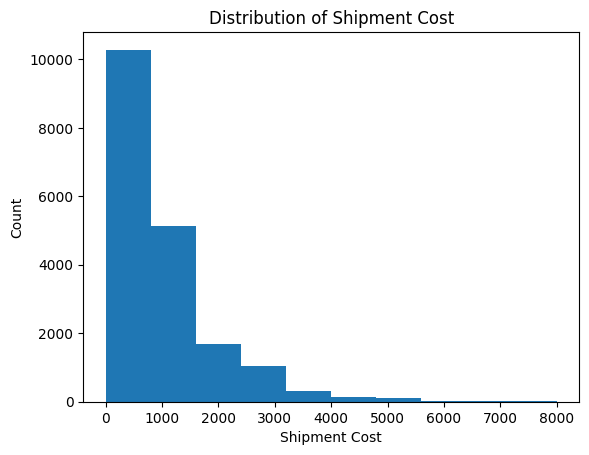

In [ ]:
#1. How is the shipment cost distributed?
# 1. Histogram to show the distribution of shipment cost
plt.hist(SwiftData['ORDER_COST'])
plt.title('Distribution of Shipment Cost')
plt.xlabel('Shipment Cost')
plt.ylabel('Count')
plt.show()



*Insights*:

*If we see the distribution of ORDER_COST  we can say that distribution is right skewed that does not followed normal distribution

Most of order_cost is less than 2000



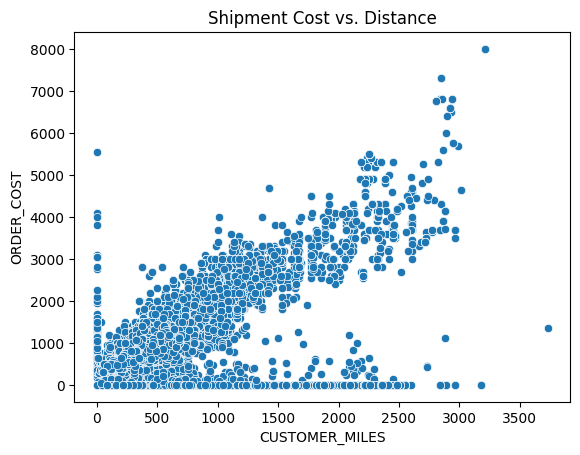

In [ ]:
#Does the shipment cost depend on the distance?
# Scatter plot to show the relationship between distance and shipment cost
sns.scatterplot(x='CUSTOMER_MILES', y='ORDER_COST', data=SwiftData)
plt.title('Shipment Cost vs. Distance')
plt.show()


**Insights**: 
Strength of relationship

Direction of relationship

 
 

---



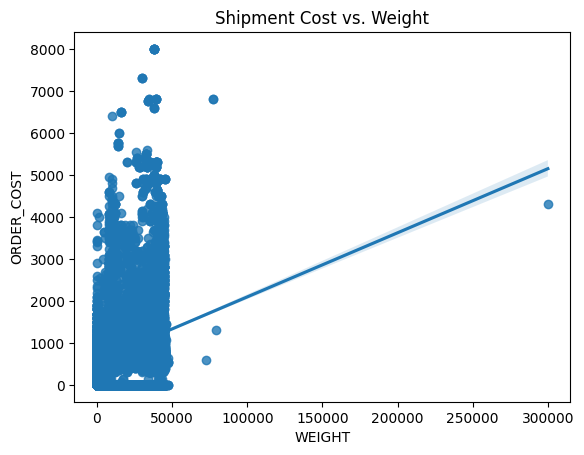

In [ ]:
# 3. Scatter plot with regression line to show the relationship between weight and shipment cost
sns.regplot(x='WEIGHT', y='ORDER_COST', data=SwiftData)
plt.title('Shipment Cost vs. Weight')
plt.show()



In [ ]:
import scipy.stats as stats

# Extract the shipment cost column and the source/destination columns from the DataFrame
shipment_cost = SwiftData['ORDER_COST']
source = SwiftData['FIRST_PICK_ZIP']
destination = SwiftData['LAST_DELIVERY_ZIP']

# Perform the ANOVA test
statistic, p_value = stats.f_oneway(shipment_cost[source == 'Source A'], 
                                    shipment_cost[source == 'Source B'], 
                                    shipment_cost[source == 'Source C'])

# Output the results
print("ANOVA Test Results:")
print("Statistic:", statistic)
print("P-value:", p_value)

# Check if there is a significant difference
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("There is a significant difference in shipment costs between sources and destinations.")
else:
    print("There is no significant difference in shipment costs between sources and destinations.")


ANOVA Test Results:
Statistic: nan
P-value: nan
There is no significant difference in shipment costs between sources and destinations.


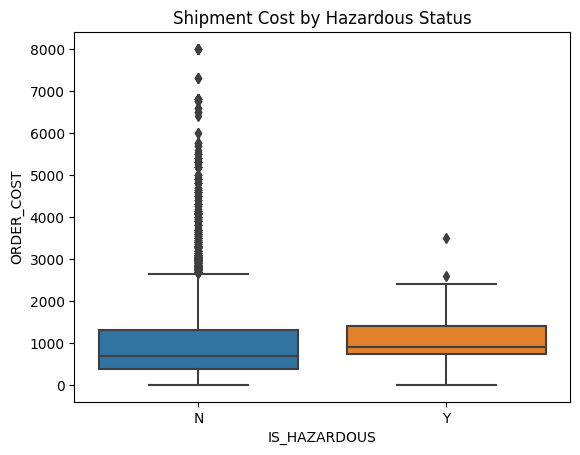

In [ ]:
# 5. Box plot to compare shipment cost for hazardous and non-hazardous items
sns.boxplot(x='IS_HAZARDOUS', y='ORDER_COST', data=SwiftData)
plt.title('Shipment Cost by Hazardous Status')
plt.show()


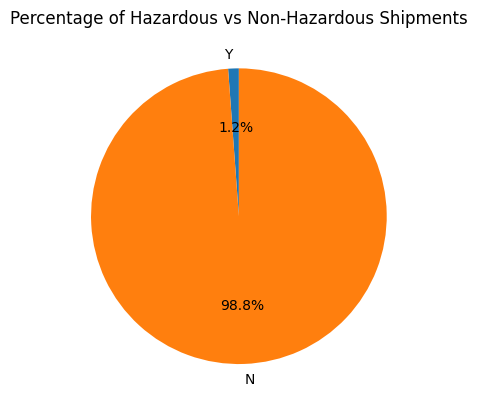

In [ ]:
labels = list(SwiftData["IS_HAZARDOUS"].value_counts(ascending = True).index)
values = list(SwiftData["IS_HAZARDOUS"].value_counts(ascending = True).values)
        
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
# set the title for the pie chart
plt.title("Percentage of Hazardous vs Non-Hazardous Shipments")
plt.show()

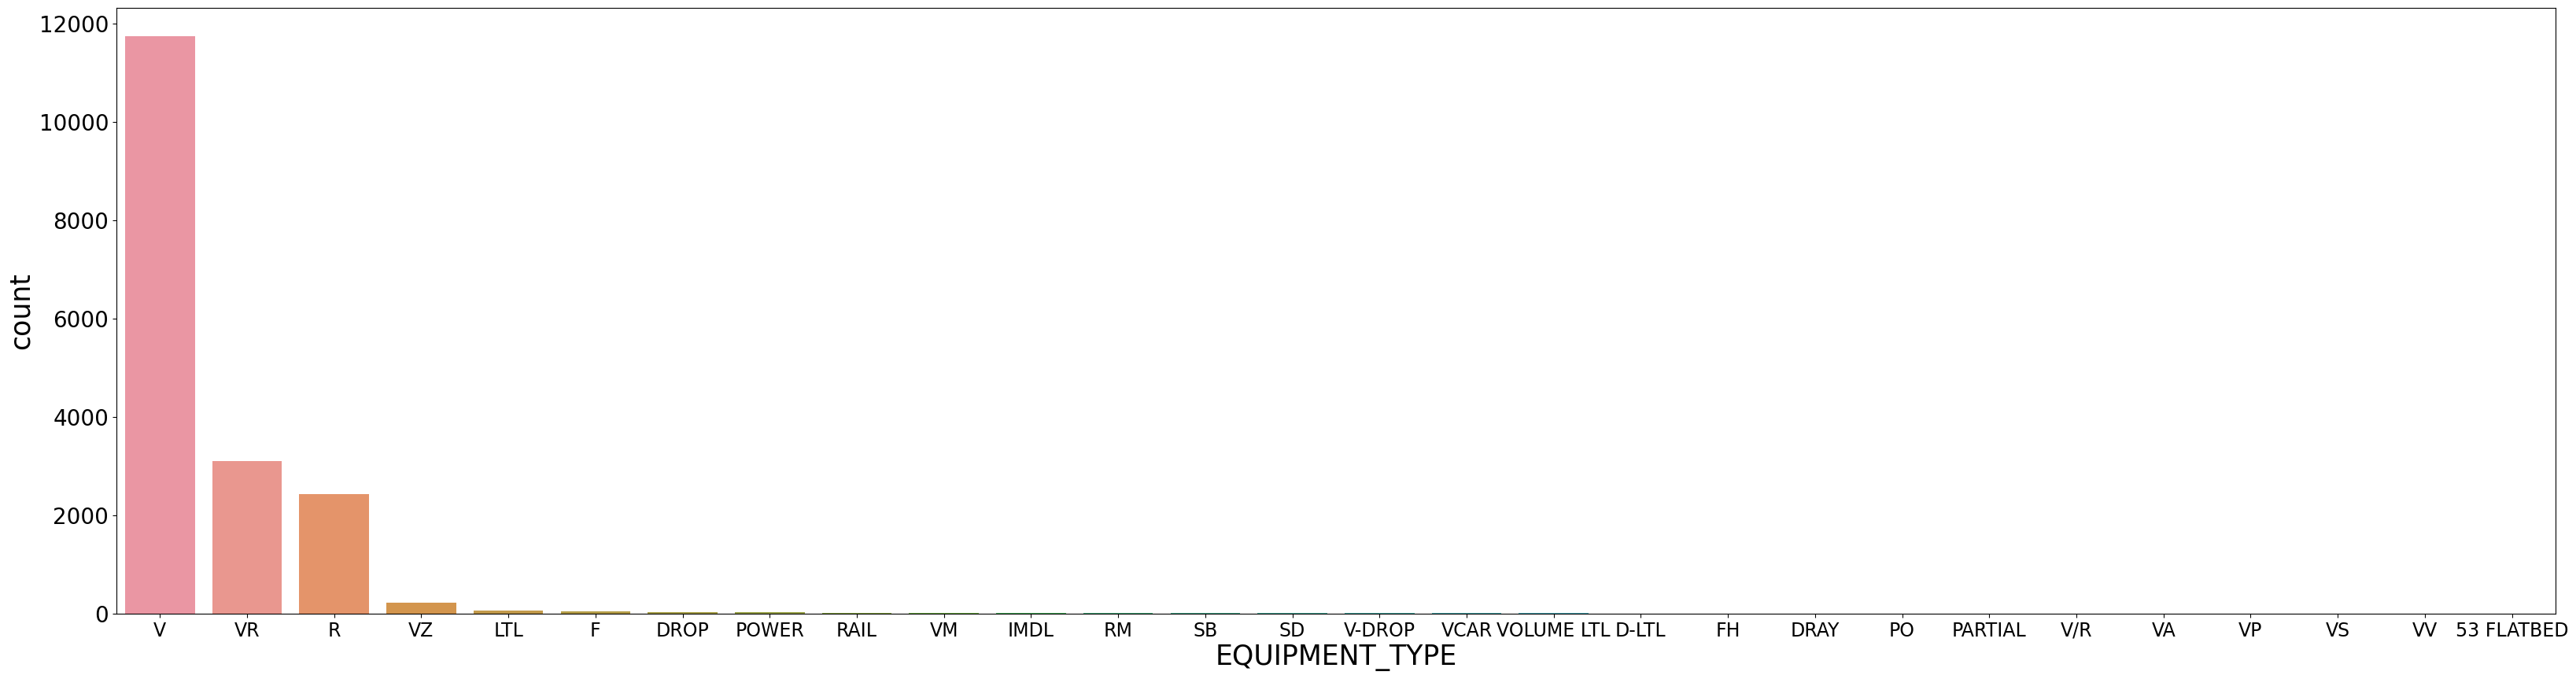

In [ ]:
plt.figure(figsize=(40,10))
order = SwiftData["EQUIPMENT_TYPE"].value_counts(normalize=True).sort_values(ascending=False).index
sns.countplot(data=SwiftData, x="EQUIPMENT_TYPE", order=order)

plt.xticks(fontsize=17)
plt.yticks(fontsize=20)

plt.xlabel("EQUIPMENT_TYPE",fontdict = {'size':25})
plt.ylabel("count",fontdict = {'size':25})
plt.show()

# We have more equipment type is V 

In [ ]:
is_hazardous_yes = SwiftData[SwiftData["IS_HAZARDOUS"]=="Y"]

In [ ]:
is_hazardous_yes.nunique().sort_values(ascending=False)

ORDER_NBR                   218
ORDER_DURATION              211
ORDER_PROCESSING_TIME       207
CREATED_DATE                196
LAST_DELIVERY_LATE_APPT     194
LAST_DELIVERY_EARLY_APPT    175
FIRST_PICK_LATE_APPT        164
FIRST_PICK_EARLY_APPT       159
Time_BETWEEN_LATE            75
Time_BETWEEN_EARLY           58
LAST_DELIVERY_ZIP            51
CUSTOMER_MILES               48
WEIGHT                       45
ORDER_COST                   38
LAST_DELIVERY_DURATION       28
FIRST_PICK_ZIP               18
FIRST_PICK_DURATION          17
EQUIPMENT_TYPE                3
IS_HAZARDOUS                  1
dtype: int64

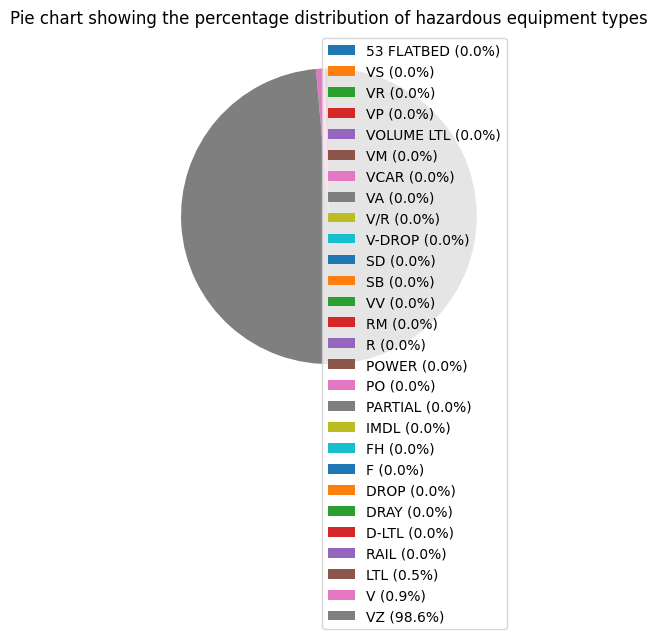

In [ ]:
labels = list(is_hazardous_yes["EQUIPMENT_TYPE"].value_counts(ascending = True).index)
values = list(is_hazardous_yes["EQUIPMENT_TYPE"].value_counts(ascending = True).values)
# Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(values, startangle=90)

# Get the percentage values
percentages = ['%.1f%%' % (100 * float(v) / sum(values)) for v in values]

# Add the percentages to the labels
labels_with_percentages = [label + ' (' + percentage + ')' for label, percentage in zip(labels, percentages)]

# Create the legend
ax1.legend(labels_with_percentages, loc='best')
plt.title("Pie chart showing the percentage distribution of hazardous equipment types")

plt.show()

# Insight  :

### Carrier used for the HAZARDOUS shipment is VZ 

We don,t require Datetime  and ZipCodes to predict the cost as we already extracted some required columns for further process  . So we can drop it from SwiftData

In [ ]:
Data=SwiftData.drop(["ORDER_NBR","FIRST_PICK_EARLY_APPT","FIRST_PICK_LATE_APPT","LAST_DELIVERY_EARLY_APPT","LAST_DELIVERY_LATE_APPT","CREATED_DATE","FIRST_PICK_ZIP","LAST_DELIVERY_ZIP"],axis=1)

In [ ]:
Data.head()

,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,IS_HAZARDOUS,Time_BETWEEN_EARLY,Time_BETWEEN_LATE,FIRST_PICK_DURATION,LAST_DELIVERY_DURATION,ORDER_PROCESSING_TIME,ORDER_DURATION
0,53 FLATBED,802.0,42000.0,0.00,N,24.5,25.0,7.5,8.0,285.133333,317.633333
1,V,0.0,40500.0,875.00,N,17.0,26.0,0.0,9.0,99.383333,125.383333
2,NaN,774.0,0.0,88.14,N,144.0,120.0,33.0,9.0,-7.083333,145.916667
3,V,0.0,40500.0,875.00,N,17.0,26.0,0.0,9.0,123.366667,149.366667
4,V,0.0,40500.0,875.00,N,17.0,26.0,0.0,9.0,146.733333,172.733333


In [ ]:
Data1=Data[Data["ORDER_COST"].notnull()]

In [ ]:
X=Data1.drop(['ORDER_COST'],axis=1)
Y=Data1['ORDER_COST']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=234)

In [ ]:
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.20,random_state=429)


In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(11988, 10)
(2998, 10)
(3747, 10)
(11988,)
(2998,)
(3747,)


In [ ]:
present_null_values_info(X_train)

,columns,null_value_count,Total_no_of_values,%_of_null_values
0,EQUIPMENT_TYPE,640,11988,5.338672
1,Time_BETWEEN_LATE,259,11988,2.160494
2,LAST_DELIVERY_DURATION,248,11988,2.068735
3,ORDER_DURATION,248,11988,2.068735
4,Time_BETWEEN_EARLY,221,11988,1.843510
5,FIRST_PICK_DURATION,199,11988,1.659993
6,ORDER_PROCESSING_TIME,171,11988,1.426426


In [ ]:
present_null_values_info(X_val)

,columns,null_value_count,Total_no_of_values,%_of_null_values
0,EQUIPMENT_TYPE,157,2998,5.236825
1,Time_BETWEEN_LATE,60,2998,2.001334
2,LAST_DELIVERY_DURATION,58,2998,1.934623
3,ORDER_DURATION,58,2998,1.934623
4,Time_BETWEEN_EARLY,51,2998,1.701134
5,FIRST_PICK_DURATION,38,2998,1.267512
6,ORDER_PROCESSING_TIME,32,2998,1.067378


In [ ]:
present_null_values_info(X_test)

,columns,null_value_count,Total_no_of_values,%_of_null_values
0,EQUIPMENT_TYPE,209,3747,5.577796
1,Time_BETWEEN_LATE,78,3747,2.081665
2,LAST_DELIVERY_DURATION,75,3747,2.001601
3,ORDER_DURATION,75,3747,2.001601
4,Time_BETWEEN_EARLY,65,3747,1.734721
5,FIRST_PICK_DURATION,62,3747,1.654657
6,ORDER_PROCESSING_TIME,52,3747,1.387777


We have null values so have to impute null values

In [ ]:
Cat_cols=['EQUIPMENT_TYPE','IS_HAZARDOUS']

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
df_cat_train = X_train[Cat_cols]
df_cat_test = X_test[Cat_cols]
df_cat_val =X_val[Cat_cols]
imputer.fit(df_cat_train)

SimpleImputer(strategy='most_frequent')

In [ ]:
df_cat_train=pd.DataFrame(imputer.transform(df_cat_train),columns=Cat_cols)
df_cat_test=pd.DataFrame(imputer.transform(df_cat_test),columns=Cat_cols)
df_cat_val=pd.DataFrame(imputer.transform(df_cat_val),columns=Cat_cols)


In [ ]:
X_train.dtypes

EQUIPMENT_TYPE            category
CUSTOMER_MILES             float64
WEIGHT                     float64
IS_HAZARDOUS              category
Time_BETWEEN_EARLY         float64
Time_BETWEEN_LATE          float64
FIRST_PICK_DURATION        float64
LAST_DELIVERY_DURATION     float64
ORDER_PROCESSING_TIME      float64
ORDER_DURATION             float64
dtype: object

#### Imputation missing Numerical columns with Median


In [ ]:
Num_cols = list(SwiftData.select_dtypes(include = "float").columns)
Num_cols.remove('ORDER_COST')
Num_cols

['CUSTOMER_MILES',
 'WEIGHT',
 'Time_BETWEEN_EARLY',
 'Time_BETWEEN_LATE',
 'FIRST_PICK_DURATION',
 'LAST_DELIVERY_DURATION',
 'ORDER_PROCESSING_TIME',
 'ORDER_DURATION']

In [ ]:
df_num_train = X_train[Num_cols]
df_num_test = X_test[Num_cols]
df_num_val = X_val[Num_cols]


In [ ]:
num_imputer=SimpleImputer(strategy='median')
num_imputer.fit(df_num_train)

SimpleImputer(strategy='median')

In [ ]:
df_num_train=pd.DataFrame(num_imputer.transform(df_num_train),columns=Num_cols)
df_num_test=pd.DataFrame(num_imputer.transform(df_num_test),columns=Num_cols)
df_num_val=pd.DataFrame(num_imputer.transform(df_num_val),columns=Num_cols)


In [ ]:
df_cat_train.isnull().sum()

EQUIPMENT_TYPE    0
IS_HAZARDOUS      0
dtype: int64

In [ ]:
#### Combine imputed categorical and numeric columns
# Combine numeric and categorical in train
X_train1=pd.concat([df_cat_train,df_num_train],axis=1)

# Combine numeric and categorical in test
X_test1=pd.concat([df_cat_test,df_num_test],axis=1)

# Combine numeric and categorical in val
X_val1=pd.concat([df_cat_val,df_num_val],axis=1)

In [ ]:
print(X_train1.shape)
print(X_test1.shape)
print(X_val1.shape)

(11988, 10)
(3747, 10)
(2998, 10)


### Standardize the numerical attributes


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create the Min-Max scaler object
scaler = StandardScaler()

# Fit and transform the num columns list using the scaler
train_std= pd.DataFrame(scaler.fit_transform(X_train1[Num_cols]),columns = Num_cols )
test_std = pd.DataFrame(scaler.transform(X_test1[Num_cols]),columns = Num_cols )
Val_std = pd.DataFrame(scaler.transform(X_val1[Num_cols]),columns = Num_cols )

### OneHotEncoder : Converting Categorical attributes to Numeric attributes


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(drop="first",sparse=False, handle_unknown="ignore")
# basically drop first column to reduce multicollinearity
# dont create sparse matrix (so that it can be in data frame )

train_ohe=pd.DataFrame(ohe.fit_transform(X_train1[Cat_cols]))
test_ohe=pd.DataFrame(ohe.transform(X_test1[Cat_cols]))
Val_ohe=pd.DataFrame(ohe.transform(X_val1[Cat_cols]))

#If we dont give any names dont show names froo columns ,so with the following code we are giving their respective  column names after doing one hot encoding 

train_ohe.columns= ohe.get_feature_names_out(X_train1[Cat_cols].columns)
test_ohe.columns=  ohe.get_feature_names_out(X_test1[Cat_cols].columns)

Val_ohe.columns = ohe.get_feature_names_out(X_val1[Cat_cols].columns)

In [ ]:
X_train_con = pd.concat([train_ohe,train_std],axis =1)

X_test_con = pd.concat([test_ohe,test_std],axis =1)

X_val_con= pd.concat([Val_ohe,Val_std],axis =1)

In [ ]:
X_train_con.head()

,EQUIPMENT_TYPE_D-LTL,EQUIPMENT_TYPE_DRAY,EQUIPMENT_TYPE_DROP,EQUIPMENT_TYPE_F,EQUIPMENT_TYPE_FH,EQUIPMENT_TYPE_IMDL,EQUIPMENT_TYPE_LTL,EQUIPMENT_TYPE_PO,EQUIPMENT_TYPE_POWER,EQUIPMENT_TYPE_R,...,EQUIPMENT_TYPE_VZ,IS_HAZARDOUS_Y,CUSTOMER_MILES,WEIGHT,Time_BETWEEN_EARLY,Time_BETWEEN_LATE,FIRST_PICK_DURATION,LAST_DELIVERY_DURATION,ORDER_PROCESSING_TIME,ORDER_DURATION
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-0.748281,-1.564860,-0.010662,-0.018584,-0.012650,-0.014044,-0.801740,-0.053353
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.349959,0.811784,0.000431,-0.010404,-0.025103,-0.016754,-0.500979,-0.033777
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.771813,-1.070125,-0.008933,-0.018110,-0.025103,-0.016754,0.314832,-0.007457
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.381239,-1.564860,-0.004323,-0.014316,-0.025103,-0.016754,-0.617387,-0.042563
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.563950,1.094340,-0.003747,-0.014316,-0.010160,-0.015549,-0.813049,-0.049303


In [ ]:
from sklearn import metrics
scores = pd.DataFrame(columns=['Model','MAE_Train','RMSE_Train','MAE_Test','RMSE_Test','R'])


#definition of error metrics function
def get_metrics(train_act,train_pred,test_act,test_pred,model_description,dataframe):
    MAE_Train = metrics.mean_absolute_error(train_act,train_pred)
    RMSE_Train =np.sqrt(metrics.mean_squared_error(train_act,train_pred))
    MAE_Test = metrics.mean_absolute_error(test_act,test_pred)
    RMSE_Test =np.sqrt(metrics.mean_squared_error(test_act,test_pred))
    R2=metrics.r2_score(train_act,train_pred)
    s1=pd.Series([model_description,MAE_Train,RMSE_Train,MAE_Test,RMSE_Test,R2],
                                           index=scores.columns)
    dataframe = dataframe.append(s1, ignore_index=True)
    return(dataframe)


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lassoReg = Lasso(alpha=.3)

lassoReg.fit(X_train_con,Y_train)

Lasso(alpha=0.3)

In [ ]:
feature_contributions = pd.Series(abs(lassoReg.coef_), index=X_train_con.columns)
feature_contributions_percentage = (feature_contributions / feature_contributions.sum()) * 100
feature_contributions_percentage = feature_contributions_percentage.sort_values(ascending=False)


In [ ]:
feature_contributions_percentage

EQUIPMENT_TYPE_RAIL          19.943580
EQUIPMENT_TYPE_RM            16.863698
CUSTOMER_MILES               12.746245
EQUIPMENT_TYPE_IMDL          10.284028
EQUIPMENT_TYPE_R              9.186236
EQUIPMENT_TYPE_F              6.328952
EQUIPMENT_TYPE_VZ             5.878334
EQUIPMENT_TYPE_LTL            5.234909
ORDER_PROCESSING_TIME         4.307739
EQUIPMENT_TYPE_VR             4.292132
WEIGHT                        3.118433
EQUIPMENT_TYPE_POWER          1.561692
EQUIPMENT_TYPE_V              0.107260
LAST_DELIVERY_DURATION        0.064872
FIRST_PICK_DURATION           0.054788
Time_BETWEEN_EARLY            0.027103
EQUIPMENT_TYPE_VP             0.000000
Time_BETWEEN_LATE             0.000000
IS_HAZARDOUS_Y                0.000000
EQUIPMENT_TYPE_VS             0.000000
EQUIPMENT_TYPE_D-LTL          0.000000
EQUIPMENT_TYPE_VA             0.000000
EQUIPMENT_TYPE_VOLUME LTL     0.000000
EQUIPMENT_TYPE_VM             0.000000
EQUIPMENT_TYPE_VCAR           0.000000
EQUIPMENT_TYPE_DRAY      

In [ ]:
from sklearn.feature_selection import SelectFromModel
important_features = SelectFromModel(lassoReg, prefit=True)
selected_features = X_train_con.columns[important_features.get_support()]


In [ ]:
selected_features

Index(['EQUIPMENT_TYPE_F', 'EQUIPMENT_TYPE_IMDL', 'EQUIPMENT_TYPE_LTL',
       'EQUIPMENT_TYPE_POWER', 'EQUIPMENT_TYPE_R', 'EQUIPMENT_TYPE_RAIL',
       'EQUIPMENT_TYPE_RM', 'EQUIPMENT_TYPE_V', 'EQUIPMENT_TYPE_VR',
       'EQUIPMENT_TYPE_VZ', 'CUSTOMER_MILES', 'WEIGHT', 'Time_BETWEEN_EARLY',
       'FIRST_PICK_DURATION', 'LAST_DELIVERY_DURATION',
       'ORDER_PROCESSING_TIME'],
      dtype='object')

In [ ]:
scores = get_metrics(Y_train,
                     lassoReg.predict(X_train_con),
                     Y_val,lassoReg.predict(X_val_con),
                     "Lasso_reg",scores)
scores

,Model,MAE_Train,RMSE_Train,MAE_Test,RMSE_Test,R
0,Lasso_reg,453.608152,661.834968,468.784151,687.396945,0.503878


 lets try with DecisionTree Regressor to get important features  

In [ ]:
from sklearn.tree import DecisionTreeRegressor,export_graphviz
import graphviz


In [ ]:
DTR =DecisionTreeRegressor(max_depth=5)

In [ ]:
De_reg = DTR.fit(X_train_con, Y_train)

In [ ]:
features = X_train_con.columns
importances = DTR.feature_importances_

indices = np.argsort(importances)[::-1]
pd.DataFrame([X_train_con.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,CUSTOMER_MILES,ORDER_DURATION,WEIGHT,ORDER_PROCESSING_TIME,Time_BETWEEN_EARLY,FIRST_PICK_DURATION,EQUIPMENT_TYPE_R,EQUIPMENT_TYPE_RAIL,EQUIPMENT_TYPE_RM,Time_BETWEEN_LATE,...,EQUIPMENT_TYPE_VA,EQUIPMENT_TYPE_VCAR,EQUIPMENT_TYPE_VM,EQUIPMENT_TYPE_VOLUME LTL,EQUIPMENT_TYPE_VP,EQUIPMENT_TYPE_VR,EQUIPMENT_TYPE_VS,EQUIPMENT_TYPE_VZ,IS_HAZARDOUS_Y,EQUIPMENT_TYPE_D-LTL
1,0.66341,0.192541,0.081814,0.04121,0.006144,0.005079,0.004755,0.001723,0.001711,0.000935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Most important features according to decisionTree are CUSTOMER_MILES,ORDER_DURATION,WEIGHT

In [ ]:
train_pred = De_reg.predict(X_train_con)
val_pred = De_reg.predict(X_val_con)

In [ ]:
scores = get_metrics(Y_train,
                     De_reg.predict(X_train_con),
                     Y_val,De_reg.predict(X_val_con),
                     "DTR",scores)
scores

,Model,MAE_Train,RMSE_Train,MAE_Test,RMSE_Test,R
0,Lasso_reg,453.608152,661.834968,468.784151,687.396945,0.503878
1,DTR,344.899261,532.030972,349.839237,566.841213,0.679400


# Parameter Tuning

In [ ]:
Regressor=DecisionTreeRegressor()
param_grid = {
              "min_samples_split": [2, 8],
              "max_depth": [None, 8],
              "min_samples_leaf": [1, 5]
             }

In [ ]:
from sklearn.model_selection import GridSearchCV
dtr_grid = GridSearchCV(Regressor,param_grid,cv=3)

In [ ]:
dtr_grid.fit(X_train_con,Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 8], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 8]})

In [ ]:

dtr_grid.fit(X_train_con,Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 8], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 8]})

In [ ]:
scores = get_metrics(Y_train,
                     dtr_grid.predict(X_train_con),
                     Y_val,dtr_grid.predict(X_val_con),
                     "DTR_parameter",scores)
scores

,Model,MAE_Train,RMSE_Train,MAE_Test,RMSE_Test,R
0,Lasso_reg,453.608152,661.834968,468.784151,687.396945,0.503878
1,DTR,344.899261,532.030972,349.839237,566.841213,0.679400
2,DTR_parameter,273.814257,442.966963,293.660438,499.194921,0.777755


In [ ]:
from sklearn.ensemble import   RandomForestRegressor


In [ ]:
RFR = RandomForestRegressor()

In [ ]:
param_grid = {"n_estimators" : [50, 100,150],
              "max_depth" : [1,10],
              "max_features" : [3, 9,5,12],
              "min_samples_leaf" : [1, 2, 4,8]}

In [ ]:
RFR_grid = GridSearchCV(RFR,param_grid,cv=2)

In [ ]:
RFR_grid.fit(X_train_con, Y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 10], 'max_features': [3, 9, 5, 12],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'n_estimators': [50, 100, 150]})

In [ ]:
RFR_grid.best_params_

{'max_depth': 10,
 'max_features': 12,
 'min_samples_leaf': 1,
 'n_estimators': 150}

In [ ]:
scores = get_metrics(Y_train,
                     RFR_grid.predict(X_train_con),
                     Y_val,RFR_grid.predict(X_val_con),
                     "RFR_best_parameter",scores)
scores

,Model,MAE_Train,RMSE_Train,MAE_Test,RMSE_Test,R
0,Lasso_reg,453.608152,661.834968,468.784151,687.396945,0.503878
1,DTR,344.899261,532.030972,349.839237,566.841213,0.679400
2,DTR_parameter,273.814257,442.966963,293.660438,499.194921,0.777755
3,RFR_best_parameter,240.107776,370.646339,275.652089,440.491441,0.844400


In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
# set of parameters to test
param_grid = {"n_estimators": [10, 15, 20, 25],
              "bootstrap": [False, True]
              }

In [ ]:
br = BaggingRegressor(random_state=0)
Ba_gr = GridSearchCV(br, param_grid, cv=5, n_jobs=-1)
Ba_gr.fit(X_train_con, Y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'n_estimators': [10, 15, 20, 25]})

In [ ]:
Ba_gr.best_params_

{'bootstrap': True, 'n_estimators': 25}

In [ ]:
scores = get_metrics(Y_train,
                     Ba_gr.predict(X_train_con),
                     Y_val,Ba_gr.predict(X_val_con),
                     "Bagging_reg_param",scores)
scores

,Model,MAE_Train,RMSE_Train,MAE_Test,RMSE_Test,R
0,Lasso_reg,453.608152,661.834968,468.784151,687.396945,0.503878
1,DTR,344.899261,532.030972,349.839237,566.841213,0.679400
2,DTR_parameter,273.814257,442.966963,293.660438,499.194921,0.777755
3,RFR_best_parameter,240.107776,370.646339,275.652089,440.491441,0.844400
4,Bagging_reg_param,85.714934,160.605417,224.515439,411.841874,0.970785


Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
GB=GradientBoostingRegressor()

In [ ]:
GB.fit(X_train_con,Y_train)

GradientBoostingRegressor()

In [ ]:
scores = get_metrics(Y_train,
                     GB.predict(X_train_con),
                     Y_val,GB.predict(X_val_con),
                     "Boosting_reg",scores)
scores

,Model,MAE_Train,RMSE_Train,MAE_Test,RMSE_Test,R
0,Lasso_reg,453.608152,661.834968,468.784151,687.396945,0.503878
1,DTR,344.899261,532.030972,349.839237,566.841213,0.679400
2,DTR_parameter,273.814257,442.966963,293.660438,499.194921,0.777755
3,RFR_best_parameter,240.107776,370.646339,275.652089,440.491441,0.844400
4,Bagging_reg_param,85.714934,160.605417,224.515439,411.841874,0.970785
5,Boosting_reg,299.310704,458.162482,314.939452,493.191236,0.762246


As we skewed data may it affecting our model performance ,lets try with transformation techniques

In [ ]:
#The log1p() function calculates the natural logarithm of the target column plus one to avoid issues with zero or negative values.
Y_train_tr = np.log1p(Y_train)
Y_val_tr=np.log1p(Y_val)
Y_test_tr=np.log1p(Y_val)


In [ ]:
Ba_gr.fit(X_train_con, Y_train_tr)

GridSearchCV(cv=5, estimator=BaggingRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'n_estimators': [10, 15, 20, 25]})

In [ ]:
scores = get_metrics(Y_train_tr,
                     RFR_grid.predict(X_train_con),
                     Y_val_tr,RFR_grid.predict(X_val_con),
                     "Transformed_y",scores)
scores

,Model,MAE_Train,RMSE_Train,MAE_Test,RMSE_Test,R
0,Lasso_reg,453.608152,661.834968,468.784151,687.396945,0.503878
1,DTR,344.899261,532.030972,349.839237,566.841213,0.679400
2,DTR_parameter,273.814257,442.966963,293.660438,499.194921,0.777755
3,RFR_best_parameter,240.107776,370.646339,275.652089,440.491441,0.844400
4,Bagging_reg_param,85.714934,160.605417,224.515439,411.841874,0.970785
5,Boosting_reg,299.310704,458.162482,314.939452,493.191236,0.762246
6,RFR_best_parameter,1.122123,1.813797,1.222020,1.967071,0.555628
7,RFR_best_parameter,1.122123,1.813797,1.222020,1.967071,0.555628
